In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as pre

In [3]:
%cd /content/drive/MyDrive/AI_Course/Math_AI/Code

/content/drive/MyDrive/AI_Course/Math_AI/Code


In [6]:
data = pd.read_csv("country_language.csv", header = 0)
data = data.astype(int)
data.head()

,Country,Language
0,2,1
1,3,1
2,4,5
3,3,1
4,4,5


In [9]:
countries = ['Canada', 'USA', 'England', 'Italy', 'Switzerland']
languages = ['English', 'French', 'Spanish', 'German', 'Italian']

df = pd.crosstab(data.Country, data.Language)
df.index = countries
df.columns = languages
df

,English,French,Spanish,German,Italian
Canada,667,307,5,10,11
USA,739,29,192,4,36
England,807,69,40,34,50
Italy,25,9,12,13,941
Switzerland,13,214,19,648,106


In [44]:
#   Normalize
P = df / df.sum().sum()
P.head()

,English,French,Spanish,German,Italian
Canada,0.1334,0.0614,0.0010,0.0020,0.0022
USA,0.1478,0.0058,0.0384,0.0008,0.0072
England,0.1614,0.0138,0.0080,0.0068,0.0100
Italy,0.0050,0.0018,0.0024,0.0026,0.1882
Switzerland,0.0026,0.0428,0.0038,0.1296,0.0212


In [49]:
row_centroid = P.sum(axis = 1)
print(f"Row centroid(marginal frequentcy distribution over countries):\n\n{row_centroid}")

Row centroid(marginal frequentcy distribution over countries):

Canada         0.2
USA            0.2
England        0.2
Italy          0.2
Switzerland    0.2
dtype: float64


In [53]:
col_centroid = P.sum(axis = 0)
print(f"Row centroid(marginal frequentcy distribution over languages):\n\n{col_centroid}")

Row centroid(marginal frequentcy distribution over languages):

English    0.4502
French     0.1256
Spanish    0.0536
German     0.1418
Italian    0.2288
dtype: float64


In [35]:
muy_ij = row_centroid.values.reshape((P.index.size, 1)) @ col_centroid.values.reshape((1, P.index.size))
lambd = (P - muy_ij) / np.sqrt(muy_ij)
lambd

,English,French,Spanish,German,Italian
Canada,-0.153887,0.020416,-0.148903,-0.244747,-0.314090
USA,0.383759,-0.079422,0.385959,-0.127460,-0.127048
England,0.883666,0.086141,0.095654,-0.009182,-0.020441
Italy,-0.232873,-0.119967,-0.059652,-0.123464,0.864727
Switzerland,-0.312844,0.082956,-0.076427,0.539392,-0.136143


In [59]:
U, S, V = np.linalg.svd(lambd)
num_sv_lambd = np.arange(1, S.size + 1)
cum_var_explained_lambd = [np.sum(np.square(S[:n])) / np.sum(np.square(S)) for n in num_sv_lambd]

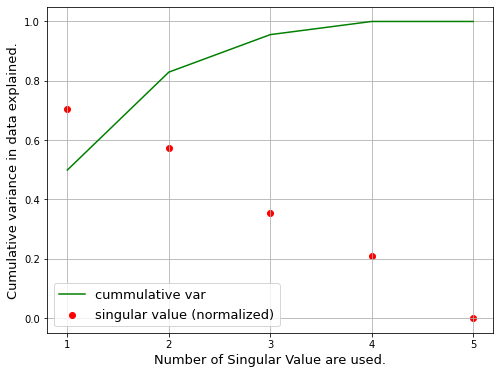

In [73]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)

ax.scatter(num_sv_lambd, pre.normalize(S.reshape(1, -1)), c = 'r', label = 'singular value (normalized)')
ax.plot(num_sv_lambd, cum_var_explained_lambd, c = 'g', label = 'cummulative var')
ax.legend(loc = 'lower left',  scatterpoints = 1, fontsize = 13)
ax.set_xticks(num_sv_lambd)
ax.set_xlabel("Number of Singular Value are used.", fontsize = 13)
ax.set_ylabel("Cumulative variance in data explained.", fontsize = 13)
plt.grid()
plt.show()

In [ ]:
country_x = U[:, 0]
country_y = U[:, 1]
country_z = U[:, 2]

In [76]:
langu_x = V[0, :]
langu_y = V[1, :]
langu_z = V[2, :]

In [77]:
import pylab
from mpl_toolkits.mplot3d import Axes3D, proj3d

In [ ]:
fig = pylab.figure(figsize = (8, 6))
ax = fig.add_subplot(111, prejection = '3d')

ax.scatter(country_x, country_y, country_z, marker = 'o', s = 50, c = 'r')
country_label = []
for i, (x, y, z) in enumerate(zip(country_x, country_y, country_z)):
  